In [21]:
import numpy as np
from qoop.compilation.qsp import QuantumCompilation
from qoop.core.ansatz import g2gn
from qoop.core.state import specific
from qoop.backend import constant
import time
%load_ext autoreload
%autoreload 2
for num_qubits in range(2, 3):
    num_layers = 1
    state = np.random.uniform(low = 0, high = 2*np.pi, size = 2**num_qubits)

    optimizers = ['sgd', 'adam', 'qng_fubini_study', 'qng_qfim', 'qng_adam']

    times = []
    num_steps = 1
    for optimizer in optimizers:
        start = time.time()
        compiler = QuantumCompilation(
            u = g2gn(num_qubits, num_layers),
            vdagger = specific(state).inverse(),
            optimizer = optimizer,
            metrics_func = [
                'loss_basic', 
                'compilation_trace_fidelities'
            ]
        )

        compiler.fit(
            num_steps = num_steps, 
        )
        #plot figure
        times.append(time.time() - start)
    print(f'num_qubits: {num_qubits}')
    np.savetxt(f'times_{num_qubits}.txt', np.round(np.array(times)/num_steps, 4))
    print(np.round(np.array(times)/num_steps, 4))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\Users\Public\Documents\Github\QNG-Benchmark\qoop\core\state.py:273: UserWarning: The input state is not normalized, we will normalize it for you
  warnings.warn("The input state is not normalized, we will normalize it for you")


num_qubits: 2
[0.0338 0.033  0.0465 0.0459 0.0459]


In [1]:
import numpy as np
from qoop.compilation.qsp import QuantumCompilation
from qoop.core.ansatz import g2gn
from qoop.core.state import specific
from qoop.backend import constant

num_layers = 1
for num_qubits in range(2, 10):
    ansatz = g2gn(num_qubits, num_layers)
    print(ansatz.num_parameters)

6
9
12
15
18
21
24
27


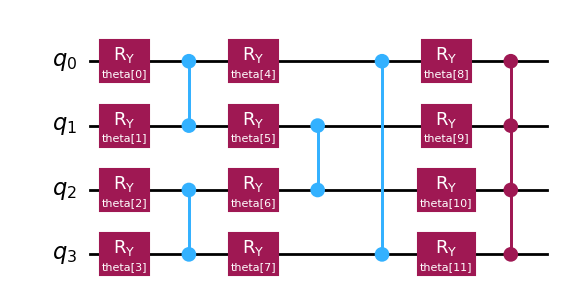

In [2]:
g2gn(4, 1).draw('mpl')